# Data Visualization with Python

The first thing we need to do is install the necesssary Python libraries - this is straightforward using PIP (Python's package manager). Run this code block to install them. If you get a message, 'Requirement already satisfied', you can move on to the next section.

To run the code, place the cursor in the following code block and select 'Run' from the menu above.

In [1]:
!pip install wordcloud
!pip install nltk
!pip install matplotlib
!pip install pandas

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Import all the csv that we need

## Option A: From Github directly (If you are working with Colab)


In [20]:
import csv # Import csv Library
import urllib.request # Import request function from urllib library


# Import books

url = 'https://raw.githubusercontent.com/DCS-training/EffectiveDataVisualisation/main/books.csv' # download the file

csv = urllib.request.urlopen(url).read() # assign the contents of the file to a variable (csv)

with open('books.csv', 'wb') as file: # create a new file and save the contents of 'csv' to this file
    file.write(csv)

    print('CSV file created')

books = pd.read_csv('books.csv')


# Import book-data

url = 'https://raw.githubusercontent.com/DCS-training/EffectiveDataVisualisation/main/book-data.csv' # download the file

csv = urllib.request.urlopen(url).read() # assign the contents of the file to a variable (csv)

with open('book-data.csv', 'wb') as file: # create a new file and save the contents of 'csv' to this file
    file.write(csv)

    print('CSV file created')

BookData = pd.read_csv('book-data.csv')


# Import books

url = 'https://raw.githubusercontent.com/DCS-training/EffectiveDataVisualisation/main/weather.csv' # download the file

csv = urllib.request.urlopen(url).read() # assign the contents of the file to a variable (csv)

with open('weather.csv', 'wb') as file: # create a new file and save the contents of 'csv' to this file
    file.write(csv)

    print('CSV file created')

weather = pd.read_csv('weather.csv')

CSV file created
CSV file created
CSV file created


### Option B: Import and Upload via Noteable

Download the following files to your computer.



*   https://github.com/DCS-training/EffectiveDataVisualisation/blob/main/books.csv
*   https://github.com/DCS-training/EffectiveDataVisualisation/blob/main/book-data.csv
*   https://github.com/DCS-training/EffectiveDataVisualisation/blob/main/weather.csv



Once the file has been saved, go back to the Noteable home tab in the browser.

    Select 'Upload' from the top right of the page.
    Browse to the file.
    Click 'Select'
    Click on the blue 'Upload' button

The file is now available to be used in Noteable

Run the following code to import them

In [21]:
import pandas as pd

csv_file='books.csv'
books = pd.read_csv(csv_file)


csv_file='book-data.csv'
BookData = pd.read_csv(csv_file)


csv_file='weather.csv'
weather = pd.read_csv(csv_file)

# Scatter Plots

We will create a basic scatter plot using the a csv file containing counts of books by genre.

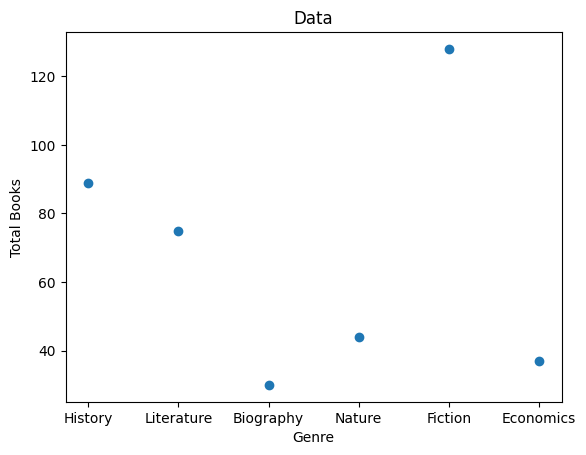

In [18]:

import matplotlib.pyplot as plt

Books = books["TotalBooks"]
Genre = books["Genre"]

x=[]
y=[]

x=list(Genre)
y=list(Books)

plt.scatter(x,y)
plt.xlabel('Genre')
plt.ylabel('Total Books')
plt.title('Data')
plt.show()



# Bar Chart

We can use the books.csv file to create a Bar Chart.

Run the next code block to create a Bar Chart

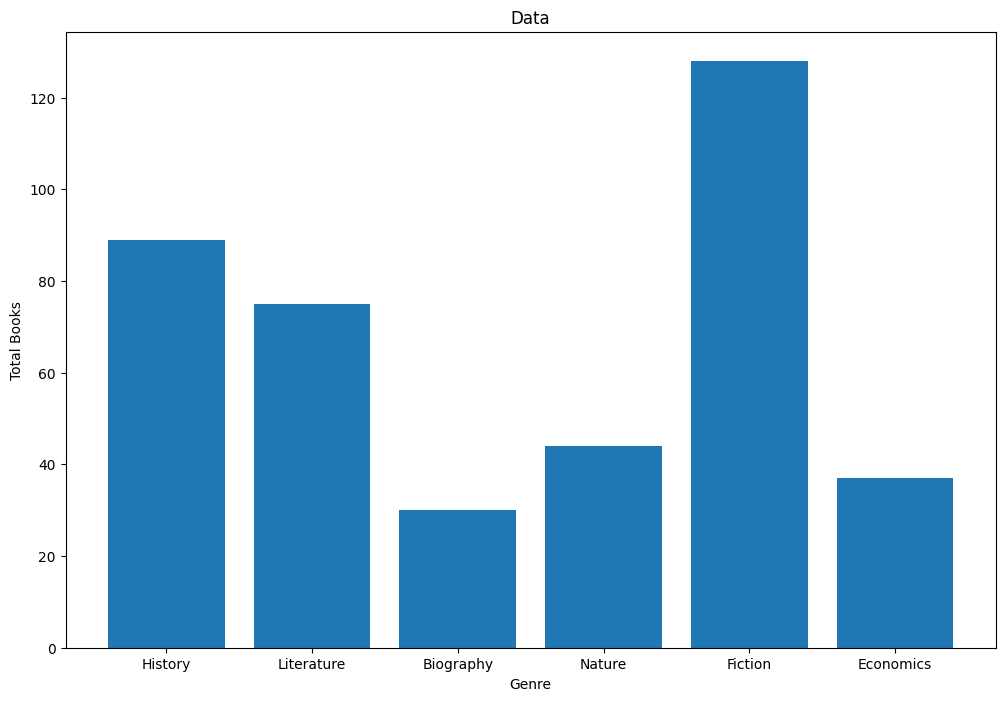

In [22]:
import matplotlib.pyplot as plt


Books = data["TotalBooks"]
Genre = data["Genre"]

x=[]
y=[]

x=list(Genre)
y=list(Books)

plt.bar(x,y)
plt.rcParams["figure.figsize"] = (12,8)
plt.xlabel('Genre')
plt.ylabel('Total Books')
plt.title('Data')
plt.show()

# Pie Chart

Run the next code block to create a Pie Chart

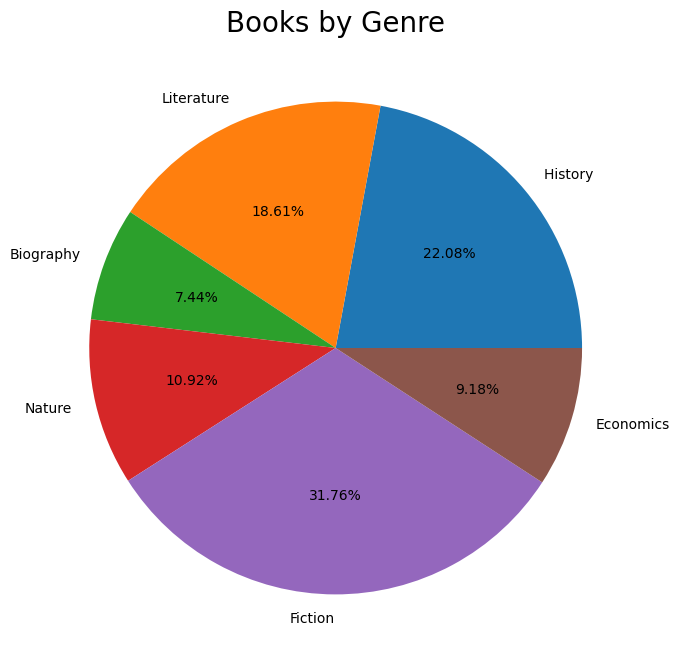

In [23]:
import matplotlib.pyplot as plt
import csv

Subjects = []
Scores = []

with open('book-data.csv', 'r') as csvfile:
    lines = csv.reader(csvfile, delimiter = ',')
    for row in lines:
        Subjects.append(row[0])
        Scores.append(int(row[1]))

plt.rcParams["figure.figsize"] = (12,8)
plt.pie(Scores,labels = Subjects,autopct = '%.2f%%')
plt.title('Books by Genre', fontsize = 20)
plt.show()

# Line Chart

We are now going to use the weather csv

This file contains date-related data so displaying as a line graph is appropriate.

Run the next code block to create the chart.

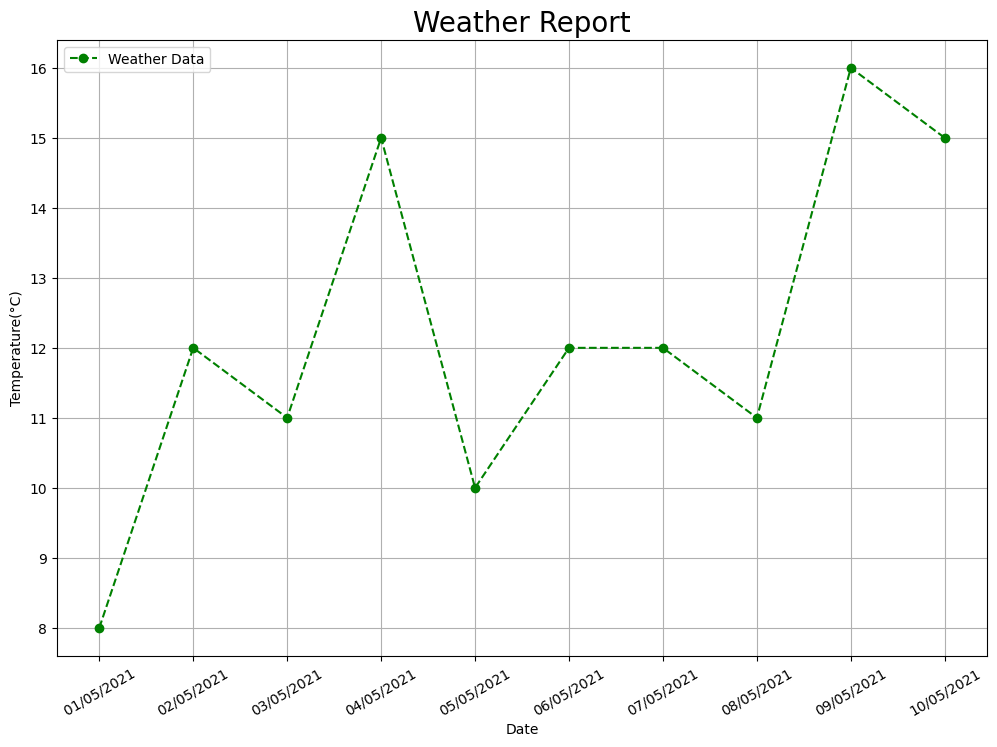

In [24]:
import matplotlib.pyplot as plt

x = []
y = []

with open('weather.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        x.append(row[0])
        y.append(int(row[1]))

plt.plot(x, y, color = 'g', linestyle = 'dashed',
         marker = 'o',label = "Weather Data")



plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Temperature(°C)')
plt.title('Weather Report', fontsize = 20)
plt.rcParams["figure.figsize"] = (12,8)
plt.grid()
plt.legend()
plt.show()

# Creating a Word Frequency Chart from a text file

Download the following file to your computer.

https://github.com/DCS-training/EffectiveDataVisualisation/blob/main/darwin-origin.txt (The origin of Species by Charles Darwin)

Once downloaded, upload to Noteable.

The following code will create a frequency list of the most common terms and display it as a Bar Chart.

Try replacing darwin-origin.txt by uploading your own text file (replace the 'source_file' variable on line 8 to reflect your filename)

In [ ]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words=set(stopwords.words("english")) # Get a list of common words to remove from text

source_file = open("darwin-origin.txt") # open file

txt = source_file.read()          # add file contents to variable
txt = txt.lower()  # lower case text
txt = re.sub(r'[^\w\s]','',txt)  #remove punctuation

tokenized_txt=word_tokenize(txt) # split text into separate words

filtered_words=[]
for w in tokenized_txt:
    if w not in stop_words:
        filtered_words.append(w)

counts = dict(Counter(filtered_words).most_common(10))

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width=0.25
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)
plt.show()

# Creating a Wordcloud from a text file

Again, using The origin of Species by Charles Darwin, or your own text file

The following code will create a frequency list of the most common terms and display it as a Wordcloud.


In [ ]:
import re
import wordcloud, string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words= stopwords.words("english") # Get a list of common words to remove from text

source_file = open("darwin-origin.txt") # open file
txt = source_file.read()          # add file contents to variable
txt = txt.lower()  # lower case text
txt = re.sub(r'[^\w\s]','',txt)  #remove punctuation

tokenized_txt=word_tokenize(txt) # split text into separate words

filtered_words=[] # Create an empty list

for w in tokenized_txt:
    if w not in stop_words: # Remove common words
        filtered_words.append(w) # Append word to list


txt = ' '.join(filtered_words).lower() # Join words back together

out_file = open("text.txt","w")

out_file.write(txt)

"""
Generating a  wordcloud from the input text.
"""

import os
from wordcloud import WordCloud

# Read the whole text.
text = open('text.txt').read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(width=640, height=480, max_font_size=80,colormap="Greens", min_font_size=12).generate(text)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


# Lexical Dispersion Plot

A lexical dispersion plot shows where keywords occur in a a text indicating position and density.

Try changing the keywords (you can use more than two) and try using your own text file.

In [ ]:
import os
import nltk

input_file=open('darwin-origin.txt').read()

tokens=nltk.word_tokenize(input_file)


text=nltk.Text(tokens)

text.dispersion_plot(["plant","fish"]) # experiment by changing these two terms


## Thank you for using this Notebook